<a href="https://colab.research.google.com/github/AMMISAIDFaical/githubtest/blob/master/GeoSpaDataExploTask_for_Remote_Sensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geospatial Data Exploration Task for Remote Sensing Internship 2024
## Task: Use a provided Sentinel-2 data cube with only raw bands, then post-process a new layer of NDVI to achieve a map and time series visualization
### Our data is :  
#### - netCDF of data cube
#### - Geojson of sub-AOI
As first step we created shortcut in google drive for thee data so that when mount our drive we will find the data available


---




# Loading and proforming an EDA on the Data
We will use to read the data
- xarray to read the NetCDF file format
- geopandas to read the Geojson of sub-AOI file



In [119]:
!pip install -q xarray geopandas rasterio netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.1 MB/s eta 0:00:00


In [124]:
import rioxarray  # activate the rio accessor
import xarray as xr
import geopandas as gpd

#paths to our data
net_cdf_path = "/content/drive/MyDrive/Colab Notebooks/machine learning practice/SpaceSense/geospatial_test_datacube.nc"
geojs_aoi_path = "/content/drive/MyDrive/Colab Notebooks/machine learning practice/SpaceSense/geospatial_sub_aoi.geojson"

#loading the data
netCDF_dataset = xr.open_dataset(net_cdf_path, decode_coords="all")
geojson_aoi = gpd.read_file(geojs_aoi_path)
netCDF_df = netCDF_dataset.to_dataframe()

In [125]:
netCDF_df.dtypes

S2_RED      float32
S2_GREEN    float32
S2_BLUE     float32
S2_NIR      float32
dtype: object

In [126]:
netCDF_data.head()

<xarray.Dataset>
Dimensions:   (time: 5, y: 5, x: 5)
Coordinates:
  * time      (time) datetime64[ns] 2021-04-09 2021-04-14 ... 2021-05-19
  * y         (y) float32 45.23 45.23 45.23 45.23 45.23
  * x         (x) float32 -69.95 -69.95 -69.95 -69.95 -69.95
Data variables:
    S2_RED    (time, y, x) float32 ...
    S2_GREEN  (time, y, x) float32 ...
    S2_BLUE   (time, y, x) float32 ...
    S2_NIR    (time, y, x) float32 ...
Attributes:
    transform:        [ 8.98405270e-05  0.00000000e+00 -6.99499045e+01  0.000...
    crs:              +init=epsg:4326
    res:              [8.98405270e-05 9.04387077e-05]
    descriptions:     ['RED', 'GREEN', 'BLUE', 'NIR']
    AREA_OR_POINT:    Area
    _FillValue:       nan
    s2_data_lineage:  {"Data origin": "S3 bucket (ARN=arn:aws:s3:::sentinel-c...
    ulx, uly:         [-69.94990454  45.23320715]

In [127]:
netCDF_df

S2_RED  S2_GREEN  S2_BLUE  S2_NIR
time       y         x                                            
2021-04-09 45.233162 -69.949860  0.0437    0.0369   0.0184  0.1882
                     -69.949768  0.0437    0.0369   0.0184  0.1882
                     -69.949677  0.0436    0.0427   0.0178  0.2138
                     -69.949593  0.0587    0.0419   0.0247  0.2156
                     -69.949501  0.0587    0.0419   0.0247  0.2156
...                                 ...       ...      ...     ...
2021-11-25 45.212723 -69.922997  0.0225    0.0259   0.0110  0.1220
                     -69.922905  0.0137    0.0167   0.0137  0.0882
                     -69.922821  0.0137    0.0167   0.0137  0.0882
                     -69.922729  0.0095    0.0154   0.0034  0.0937
                     -69.922638  0.0164    0.0171   0.0070  0.1038

[1587184 rows x 4 columns]

# What is NDVI (Normalized Difference Vegetation Index) ?
- NDVI always ranges from -1 to +1. But there isn’t a distinct boundary for each type of land cover.

- Negative values, it’s highly likely that it’s water.
Close to +1 implies high possibility of a dense green leaves.

- when NDVI is close to zero, there are likely no green leaves and it could even be an urbanized area.

---

The Normalized Difference Vegetation Index (NDVI) uses the NIR and red channels in its formula, given by:
$$
\text{NDVI} = \frac{\text{NIR} - \text{Red}}{\text{NIR} + \text{Red}}
$$
details are provided here : **[GISGeography](https://gisgeography.com/ndvi-normalized-difference-vegetation-index/)**

## Steps
* Calculation of NDVI over the AOI for each date given in the
  data cube and added as a separate data layer in the same provided data cube.
* A visual RGB image of one date
* Distribution (histogram) of NDVI pixels.
* Time series of NDVI averaged over the AOI.

In [79]:
!pip install -q rasterio

### Calculation of NDVI

In [132]:
# Calculate NDVI
ndvi = (netCDF_dataset['S2_NIR'] - netCDF_dataset['S2_RED']) / (netCDF_dataset['S2_NIR'] + netCDF_dataset['S2_RED'])
netCDF_dataset['NDVI'] = ndvi  # Add NDVI as a new data variable

In [133]:
netCDF_dataset #just to check the new col ndvi

<xarray.Dataset>
Dimensions:   (time: 23, y: 227, x: 304)
Coordinates:
  * time      (time) datetime64[ns] 2021-04-09 2021-04-14 ... 2021-11-25
  * y         (y) float32 45.23 45.23 45.23 45.23 ... 45.21 45.21 45.21 45.21
  * x         (x) float32 -69.95 -69.95 -69.95 -69.95 ... -69.92 -69.92 -69.92
Data variables:
    S2_RED    (time, y, x) float32 0.0437 0.0437 0.0436 ... 0.0137 0.0095 0.0164
    S2_GREEN  (time, y, x) float32 0.0369 0.0369 0.0427 ... 0.0167 0.0154 0.0171
    S2_BLUE   (time, y, x) float32 0.0184 0.0184 0.0178 ... 0.0137 0.0034 0.007
    S2_NIR    (time, y, x) float32 0.1882 0.1882 0.2138 ... 0.0882 0.0937 0.1038
    NDVI      (time, y, x) float32 0.6231 0.6231 0.6612 ... 0.7311 0.8159 0.7271
Attributes:
    transform:        [ 8.98405270e-05  0.00000000e+00 -6.99499045e+01  0.000...
    crs:              +init=epsg:4326
    res:              [8.98405270e-05 9.04387077e-05]
    descriptions:     ['RED', 'GREEN', 'BLUE', 'NIR']
    AREA_OR_POINT:    Area
    _FillValue:       nan
    s2_data_lineage:  {"Data origin": "S3 bucket (ARN=arn:aws:s3:::sentinel-c...
    ulx, uly:         [-69.94990454  45.23320715]

### A visual RGB image of one date

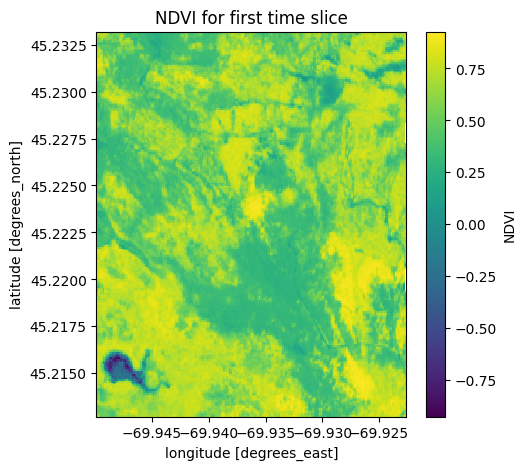

In [135]:
import matplotlib.pyplot as plt

# Visualizing the first time slice of NDVI
plt.figure(figsize=(5, 5))
netCDF_dataset['NDVI'].isel(time=0).plot(cmap='viridis')
plt.title('NDVI for first time slice')
plt.show()

### Distribution (histogram) of NDVI pixels

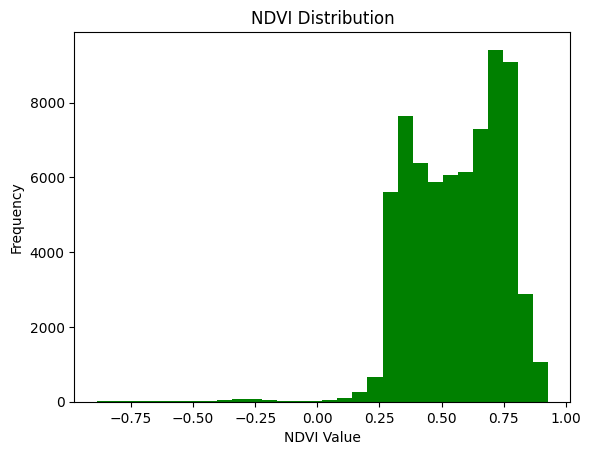

In [139]:
ndvi.isel(time=0).plot.hist(bins=30, color='green')
plt.title('NDVI Distribution')
plt.xlabel('NDVI Value')
plt.ylabel('Frequency')
plt.show()

###Time Series Analysis of NDVI

In [160]:
ndvi_mean_ts = ndvi.mean(dim=['x', 'y'])

In [155]:
# ndvi_mean_ts = ndvi_mean_ts.to_dataframe

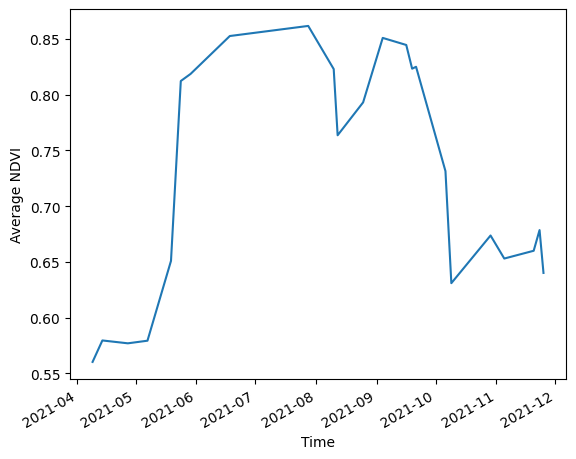

In [161]:
ndvi_mean_ts.plot()
plt.title('Time Series of Average NDVI')
plt.xlabel('Time')
plt.ylabel('Average NDVI')
plt.show()

# Description of the spatial distribution and evolution of the NDVI/vegetation

From the NDVI Distribution plot we can see that :
  - For a NDVI in the range of [0.70- 0.85] we have high frequency near 8000 pixel level distubtion which implies high possibility of a dense green leaves.

  - We have aslo For NDVI in range of [0.0 - 0.25] implies that no green leaves in the area but the frequency is low.

From the plot of the NDVI Time Series Analysis
  - We notice spike in avg NVDI in the range [2021/05 - 2021/10] which is indecates that the area was green.

  - In the two remaining time ranges [2021/04 - 2021/05] and [2021/10 - 2021/12] the NDVI was low and the green area was disappearning

# A visualization of NDVI clipped to the provided sub-AOI

## Identifying the CRS Coordinate Reference System

In [128]:
# Print the CRS
print(geojson_aoi.crs)

EPSG:4326


In [110]:
netCDF_dataset = netCDF_dataset.rio.write_crs("epsg:4326")

# Clip the data using rioxarray
clipped_ds = netCDF_dataset.rio.clip(geojson_aoi.geometry, crs=geojson_aoi.crs)
# clipped_ds

In [89]:
clipped_ds_df = clipped_ds.to_dataframe()
# netCDF_df
# clipped_ds_df

In [113]:
# Calculate NDVI
ndvi = (clipped_ds['S2_NIR'] - clipped_ds['S2_RED']) / (clipped_ds['S2_NIR'] + clipped_ds['S2_RED'])

ndvi = ndvi.rename("NDVI")  # Renaming the DataArray to NDVI
ndvi.attrs['long_name'] = 'Normalized Difference Vegetation Index'

# Adding NDVI as a new variable to the dataset
clipped_ds['NDVI'] = ndvi

In [114]:
clipped_ds

<xarray.Dataset>
Dimensions:      (time: 23, y: 170, x: 245)
Coordinates:
  * time         (time) datetime64[ns] 2021-04-09 2021-04-14 ... 2021-11-25
  * y            (y) float32 45.23 45.23 45.23 45.23 ... 45.22 45.22 45.22 45.22
  * x            (x) float32 -69.95 -69.95 -69.95 ... -69.93 -69.93 -69.93
    spatial_ref  int64 0
Data variables:
    S2_RED       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    S2_GREEN     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    S2_BLUE      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    S2_NIR       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    NDVI         (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    transform:        [ 8.98405270e-05  0.00000000e+00 -6.99499045e+01  0.000...
    res:              [8.98405270e-05 9.04387077e-05]
    descriptions:     ['RED', 'GREEN', 'BLUE', 'NIR']
    AREA_OR_POINT:    Area
    _FillValue:       nan
    s2_data_lineage:  {"Data origin": "S3 bucket (ARN=arn:aws:s3:::sentinel-c...
    ulx, uly:         [-69.94990454  45.23320715]

## The example visualizes the first time slice.
- By Adjust isel(time=0) to other indices we can inspect different time points

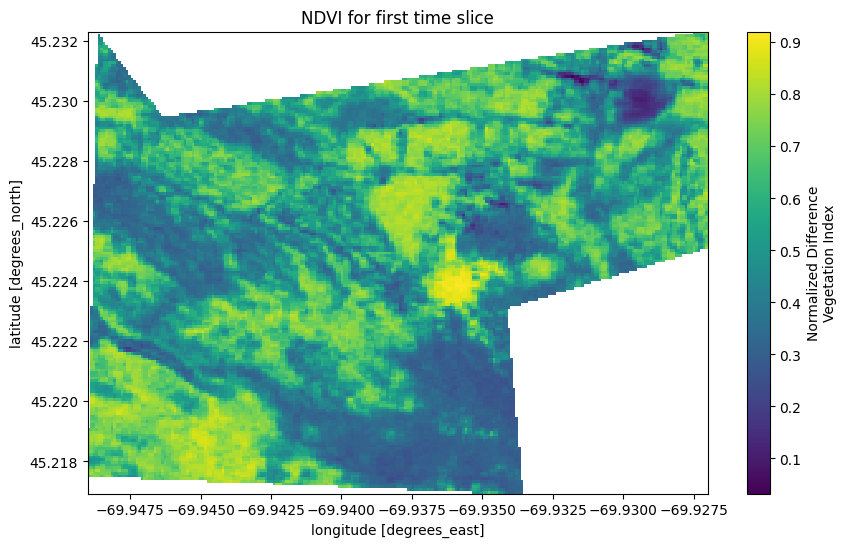

In [116]:
# Visualizing the first time slice of NDVI
plt.figure(figsize=(10, 6))
clipped_ds['NDVI'].isel(time=0).plot(cmap='viridis')
plt.title('NDVI for first time slice')
plt.show()